# 时间序列的模式

时间序列（time series）是一个变量在连续时点或连续时期上测量的观测值的序列。

为了确定数据中的基本模式，有效的第一步是绘制时间序列图（time series plot）。

时间序列图是时间和时间序列变量之间关系的图形表述。时间位于横轴，时间序列值位于纵轴。

## 水平模式

当数据围绕着一个不变的均值上下波动时，则存在水平模式（horizontal pattern）。

为了说明时间序列拥有水平模式，考虑数据集中的数据。这些数据是佛蒙特州本宁顿的一个汽油批发商销售汽油的数量。时间序列的平均数或均值为每周 19.25 或 19250 加仑。

图17-1是这些数据的时间序列图。注意，这些数据围绕着样本均值 19250 加仑上下波动。尽管呈现随机波动，但我们仍然说这些数据有水平模式。

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set_theme(color_codes=True)

(0.0, 25.0)

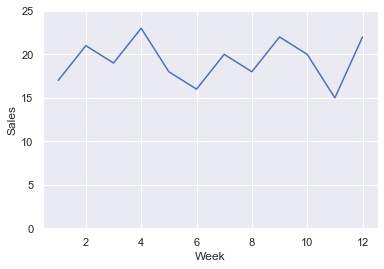

In [23]:
gasoline = pd.read_csv('ch17/Gasoline.csv')
sns.lineplot(x="Week", y="Sales", data=gasoline).axes.set_ylim(0,25)

经营状况的改变常常导致有水平模式的时间序列移动到一个新的水平。

例如，假设汽油批发商与佛蒙特州警方签署了一份合同，给佛蒙特州南部的警车加油。

由于这个新合同，批发商希望看到从第13周开始周销售量有大幅度的增加。

下面给出了汽油销售量的原始时间序列以及签署了新合同后10周的销售量数据。

注意从第13周开始时间序列水平增加了，时间序列水平的改变使得选择一个合适的预测方法变得更为困难。

选择能较好地适应时间序列水平改变的预测方法在许多实际应用中是一件重要的值得考虑的事情。

(0.0, 40.0)

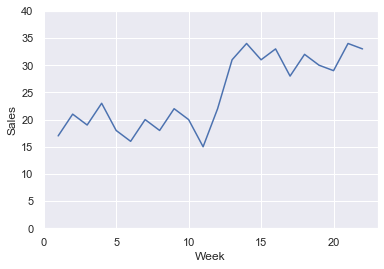

In [24]:
gasolineRevised = pd.read_csv('ch17/GasolineRevised.csv')
sns.lineplot(x="Week", y="Sales", data=gasolineRevised).axes.set_ylim(0,40)

## 趋势模式

尽管时间序列数据通常呈现随机起伏的状态，但在一段较长的时间内，它仍然呈现出逐步的改变或移动到相对较高或较低的值。

如果时间序列图显示出这类形态特征，我们则称存在趋势模式（trend pattern）。

趋势通常是长期因素影响的结果，例如人口总数的增加或减少、人口总体统计特征、工艺和顾客偏爱的变化等。

为了说明拥有趋势模式的时间序列，我们考虑某自行车制造厂过去10年自行车销售量的时间序列。

注意第1年自行车的销售量为21600辆，第2年自行车的销售量为22900辆，…，第10年（最近1年）自行车的销售量为31400辆。

时间序列图直观地显示出，在过去10年中销售量有上下波动，但时间序列似乎总体是增长的或有向上的趋势。

(20.0, 34.0)

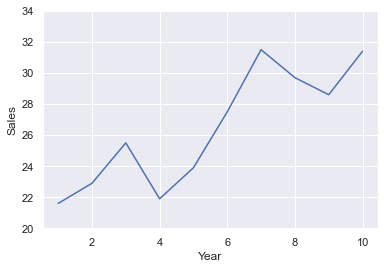

In [38]:
bicycle = pd.read_csv('ch17/Bicycle.csv')
sns.lineplot(x="Year", y="Sales", data=bicycle).axes.set_ylim(20,34)

## 季节模式
时间序列的趋势是根据分析历史数据多年的移动来识别的。我们通过在连续的时间段观测同样的重复模式来确认季节模式。

季节模式（seasonal pattern）是指在超过一年的周期内，由于季节的影响，时间序列呈现重复模式。尽管我们通常认为时间序列的季节变动是在一年内出现的，但在小于一年的时期内，时间序列数据也可能呈现季节模式。

例如，每天的交通流量数据显示在一天内的“季节”情况，高峰流量在上下班期间，中等流量在白天和磅晚，小流量是从午
夜到清晨。

作为季节模式的一个例子，我们考虑过去5年一家服装店的雨伞销售量。时间序列图没有显示销售量有长期趋势。

事实上，如果不仔细观测数据，你可能会得出数据有水平模式的结论。

但是，仔细检查时间序列图，你会发现数据有一个规律，即第一季度和第三季度的销售量中等，第二季度的销售量最高，第四季度的销售量最低。因此，我们得出结论存在季度的季节模式。

In [57]:
umbrella = pd.read_csv('ch17/Umbrella.csv')

In [59]:
umbrella_wide = umbrella.pivot("Year", "Quarter", "Sales")
umbrella_wide

Quarter,1,2,3,4
Year,,,,
1,125,153,106,88
2,118,161,133,102
3,138,144,113,80
4,109,137,125,109
5,130,165,128,96


<AxesSubplot:xlabel='Period', ylabel='Sales'>

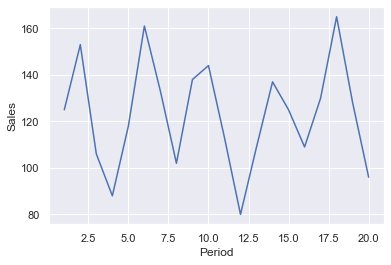

In [60]:
# 如果只看总体趋势，看不出明显的规律
sns.lineplot(x="Period", y="Sales", data=umbrella)

<AxesSubplot:xlabel='Quarter', ylabel='Sales'>

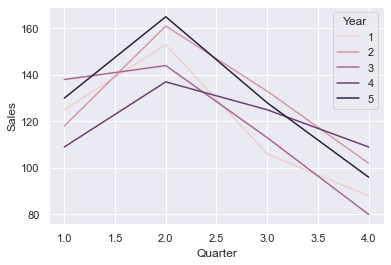

In [61]:
# 如果按照季度来看，可以发现规律
sns.lineplot(data=umbrella, x='Quarter', y='Sales', hue='Year')

## 趋势与季节模式
有时，时间序列同时包含趋势模式与季节模式。

In [69]:
tvSales = pd.read_csv('ch17/TVSales.csv')
tvSales

,Year,Quarter,Sales (1000s)
0,1,1,4.8
1,1,2,4.1
2,1,3,6.0
3,1,4,6.5
4,2,1,5.8
5,2,2,5.2
6,2,3,6.8
7,2,4,7.4
8,3,1,6.0
9,3,2,5.6


<AxesSubplot:xlabel='Quarter', ylabel='Sales (1000s)'>

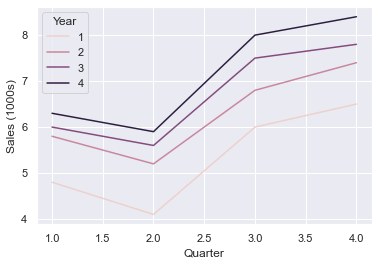

In [71]:
sns.lineplot(data=tvSales, x='Quarter', y='Sales (1000s)', hue='Year')

# 移动平均法和指数平滑法

在本节我们将讨论适合有水平模式的时间序列的 3 种预测方法：
- 移动平均法
- 加权移动平均法
- 指数平滑法。

这些方法能很好地适应水平模式的水平数值的改变。

但是，当有明显的趋势、循环或季节影响时，这些方法未经修正是不适合的。由于每一种方法的目的都是“消除”时间序列的随机波动，因此它们都被称为平滑方法。

这些方法易于使用，通常对短期预测如下一个时期的预测，可以提供较高的精度水平。

## 移动平均法

移动平均法（moving average），使用时间序列中最近期数据值的平均数作为下一个时期的预测值。在数学上，$k$ 阶移动平均预测如下：
$$ F_{t+1} = \frac{最近k期数据值之和}{k} = \frac{Y_t + Y_{t-1} + \cdots + Y_{t-k+1}}{k} $$

- $F$ 代表时间序列 $t+1$ 期的预测值
- $Y$ 代表时间序列期的实际值。

术语移动的含义是，每次使用时间序列的新观测值，用它代替公式中最旧的观测值，从而计算出一个新的平均数。因此，当使用新观测值时，平均数将会改变或者移动。

In [98]:
gasoline['3week_rolling_avg'] = gasoline.Sales.rolling(3).mean()
weights = np.array([1/6, 2/6, 3/6])
gasoline['3week_rolling_weight_avg'] = gasoline['Sales'].rolling(3).apply(lambda x: np.sum(weights*x))
gasoline

,Week,Sales,3week_rolling_avg,3week_rolling_weight_avg
0,1,17,NaN,NaN
1,2,21,NaN,NaN
2,3,19,19.0,19.333333
3,4,23,21.0,21.333333
4,5,18,20.0,19.833333
5,6,16,19.0,17.833333
6,7,20,18.0,18.333333
7,8,18,18.0,18.333333
8,9,22,20.0,20.333333
9,10,20,20.0,20.333333


<AxesSubplot:xlabel='Week', ylabel='Sales'>

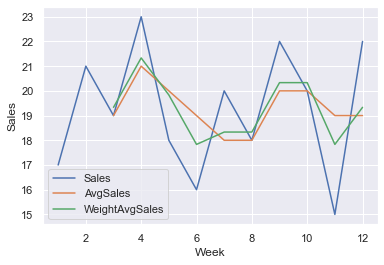

In [99]:
sns.lineplot(x="Week", y="Sales", data=gasoline, label='Sales')
sns.lineplot(x="Week", y="3week_rolling_avg", data=gasoline, label='AvgSales')
sns.lineplot(x="Week", y="3week_rolling_weight_avg", data=gasoline, label='WeightAvgSales')

## [指数平滑法](https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html)

指数平滑法（exponential smoothing）也是利用过去的时间序列值的加权平均数作为预测值。

它是加权移动平均法的一个特例，即我们只选择一个权重——最近时期观测值的权重。

其他数据值的权重可以自动推算出来，并且随着观测值距离预测期越远，权重也变得越小。指数平滑法的基本方程如下：

$$F_{t+1}=\alpha Y_t +(1-\alpha）F_t$$

- $F_{t+1}$ 代表时间序列 $t+1$ 期的预测值
- $Y_t$ 代表时间序列 $t$ 期的实际值
- $F_t$ 代表时间序列 $t$ 期的预测值
- $a$ 代表平滑常数（$0 \le \alpha \le 1$）。

In [118]:
data = pd.read_csv('ch17/Gasoline.csv')

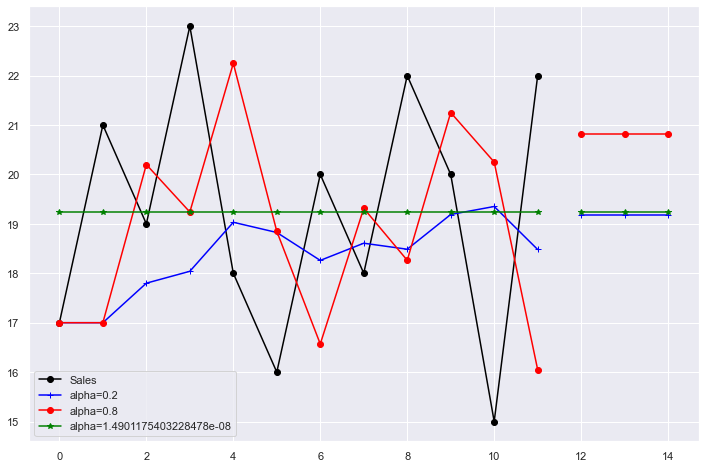

In [119]:
from statsmodels.tsa.api import SimpleExpSmoothing
#First Instance
ins1 = SimpleExpSmoothing(data['Sales']).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(data['Sales']).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=0.8')

#Third Instance
ins3 = SimpleExpSmoothing(data['Sales']).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = data['Sales'].plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.show()

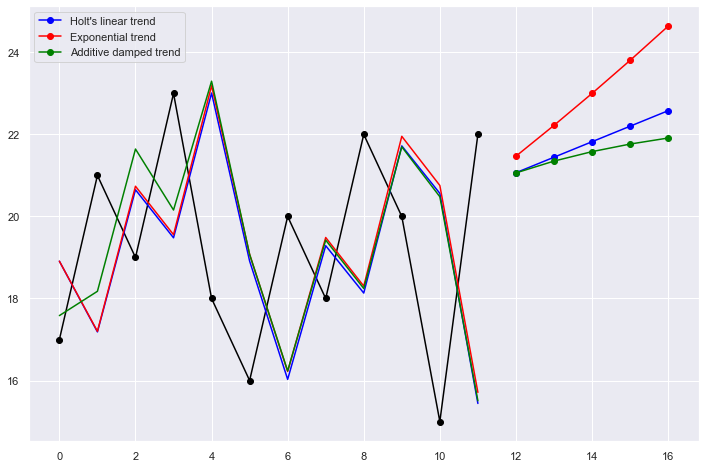

In [120]:
from statsmodels.tsa.api import Holt

fit1 = Holt(data['Sales'], initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(data['Sales'], exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(data['Sales'], damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(data['Sales'], marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])